In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
# Import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier 
# Import train_test_split function
from sklearn.model_selection import train_test_split 
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

In [2]:
data=pd.read_csv("C:/Users/PRASHANT/Downloads/archive (1)/Admission_Predict_Ver1.1.csv")
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [4]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [5]:
data.isnull().sum()


Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [6]:
print("There are {} rows and {}columns.".format(data.shape[0],data.shape[1]))

There are 500 rows and 9columns.


In [7]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [8]:
data['Research'].value_counts()


1    280
0    220
Name: Research, dtype: int64

In [9]:
data['SOP'].value_counts()

4.0    89
3.5    88
3.0    80
2.5    64
4.5    63
2.0    43
5.0    42
1.5    25
1.0     6
Name: SOP, dtype: int64

In [10]:
print(data.Research== 1)

0       True
1       True
2       True
3       True
4      False
       ...  
495     True
496     True
497     True
498    False
499    False
Name: Research, Length: 500, dtype: bool


C:\Users\PRASHANT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


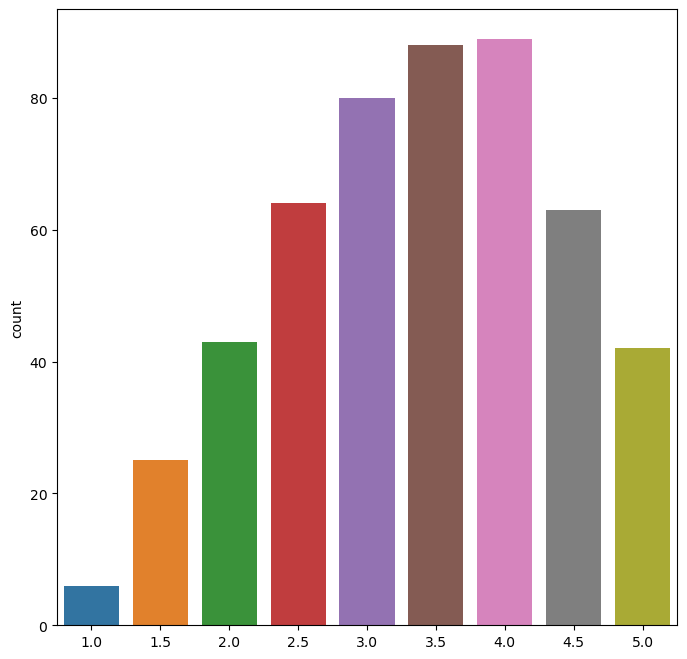

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8));
sns.countplot(data['SOP'].values);


In [12]:
feature_cols = ['GRE Score','TOEFL Score','University Rating','SOP','CGPA','Research']
X = data[feature_cols] # Features
y = data.Research # Target variable


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
random_state=1) # 70% training and 30% test

In [14]:
len(X_train)

350

In [15]:
len(X_test)


150

In [16]:
# Create Decision Tree classifer object
dtclf = DecisionTreeClassifier()
# Fit Decision Tree Classifer
dtclf = dtclf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = dtclf.predict(X_test)
print(y_pred)

[0 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 0 1 0 1 1 0 1 0 1 0 1 0
 0 0 1 0 1 1 1 1 0 0 0 1 0 1 1 1 1 0 1 1 0 1 1 0 0 1 1 1 0 1 1 1 0 0 0 1 0
 1 0 1 1 1 1 1 0 1 1 0 0 1 1 0 0 0 1 0 1 1 1 1 0 0 0 0 1 0 1 1 1 1 0 1 0 0
 1 1 1 0 0 1 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 0 0 0 1 0 0 0 1 0 0
 0 1]


In [17]:
# Model Accuracy, how often is the classifier correct?
accuracy=metrics.accuracy_score(y_pred,y_test)*100
print("Accuracy of the model is {:.2f}".format(accuracy))


Accuracy of the model is 100.00


In [18]:
metrics.confusion_matrix(y_pred,y_test)

array([[63,  0],
       [ 0, 87]], dtype=int64)

In [19]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [20]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


[Text(0.5, 0.75, 'X[5] <= 0.5\ngini = 0.495\nsamples = 350\nvalue = [157, 193]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 157\nvalue = [157, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 193\nvalue = [0, 193]')]

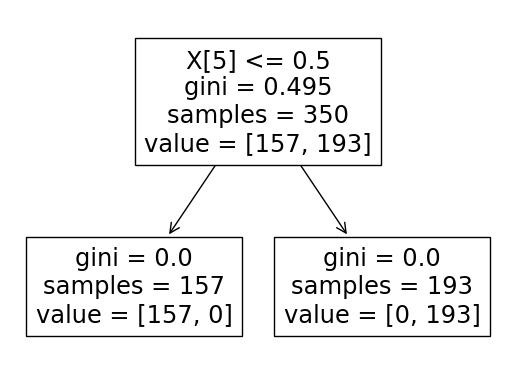

In [21]:
from sklearn import tree
tree.plot_tree(dtclf)
